In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import model_selection


In [3]:
df = pd.read_excel("evler.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ilce           99 non-null     int64
 1   turu           99 non-null     int64
 2   net_metrekare  99 non-null     int64
 3   oda_sayisi     99 non-null     int64
 4   kat            99 non-null     int64
 5   yas            99 non-null     int64
 6   fiyat          99 non-null     int64
dtypes: int64(7)
memory usage: 5.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ilce,99.0,6.818182,2.442663,1.0,6.0,7.0,9.0,10.0
turu,99.0,11.282828,0.452666,11.0,11.0,11.0,12.0,12.0
net_metrekare,99.0,164.717172,126.509179,48.0,120.0,145.0,165.0,1000.0
oda_sayisi,99.0,3.919192,0.922251,2.0,3.0,4.0,4.0,10.0
kat,99.0,2.888889,2.014685,1.0,2.0,2.0,3.5,12.0
yas,99.0,6.353535,6.389266,1.0,1.0,5.0,8.0,29.0
fiyat,99.0,548950.616162,260940.039928,159000.0,392500.0,480000.0,627500.0,2000000.0


In [6]:
df.head()

,ilce,turu,net_metrekare,oda_sayisi,kat,yas,fiyat
0,4,11,150,3,1,26,350000
1,4,11,140,4,3,8,690000
2,4,11,110,5,1,18,267500
3,10,11,100,3,2,18,285000
4,10,12,160,4,7,14,570000


In [7]:
df.ilce.value_counts()

9     28
6     18
7     17
8     12
2      6
1      5
10     5
4      3
5      3
3      2
Name: ilce, dtype: int64

<AxesSubplot:>

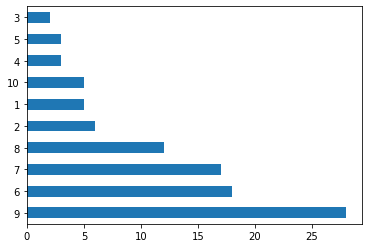

In [8]:
df.ilce.value_counts().plot.barh()

In [9]:
df.turu.value_counts()

11    71
12    28
Name: turu, dtype: int64

<AxesSubplot:>

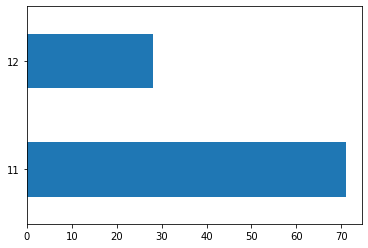

In [10]:
df.turu.value_counts().plot.barh()

In [11]:
df.net_metrekare.describe()

count      99.000000
mean      164.717172
std       126.509179
min        48.000000
25%       120.000000
50%       145.000000
75%       165.000000
max      1000.000000
Name: net_metrekare, dtype: float64

In [12]:
df.oda_sayisi.value_counts()

4     59
3     24
5     12
2      2
6      1
10     1
Name: oda_sayisi, dtype: int64

<AxesSubplot:>

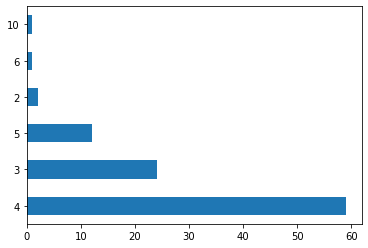

In [13]:
df.oda_sayisi.value_counts().plot.barh()

In [14]:
df.yas.value_counts()

1     29
6     16
4      8
8      7
5      7
12     6
3      6
2      4
18     3
7      2
14     2
17     2
9      1
15     1
22     1
24     1
26     1
28     1
29     1
Name: yas, dtype: int64

Text(0, 0.5, 'yas')

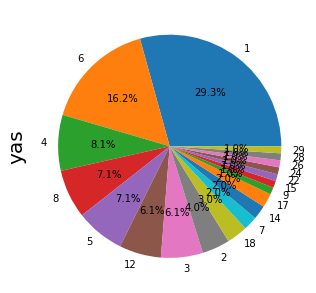

In [15]:
fig = plt.figure(figsize=(5,15))
df.yas.value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("yas", fontsize = 20)

In [16]:
df.kat.value_counts()

2     33
3     21
1     20
4     10
5     10
12     2
6      1
7      1
10     1
Name: kat, dtype: int64

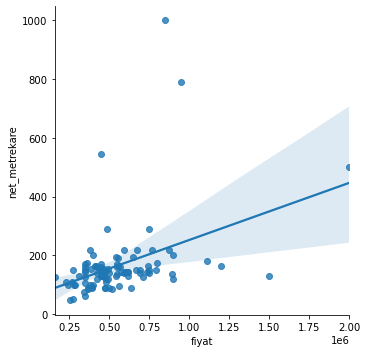

In [17]:
sns.lmplot(x='fiyat', y='net_metrekare', data=df)

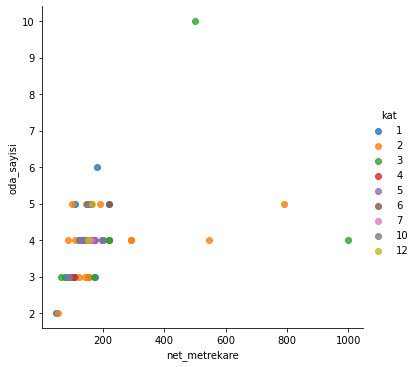

In [18]:
sns.lmplot(x = 'net_metrekare', y = 'oda_sayisi', fit_reg = False, hue = 'kat', data = df)

<AxesSubplot:xlabel='yas', ylabel='fiyat'>

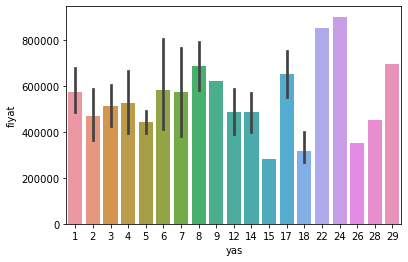

In [19]:
sns.barplot(x = "yas", y = "fiyat", data = df)

In [20]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [21]:
import pandas as pd

In [22]:
df = pd.read_excel("evler.xlsx")

df.head()

,ilce,turu,net_metrekare,oda_sayisi,kat,yas,fiyat
0,4,11,150,3,1,26,350000
1,4,11,140,4,3,8,690000
2,4,11,110,5,1,18,267500
3,10,11,100,3,2,18,285000
4,10,12,160,4,7,14,570000


In [23]:
df

,ilce,turu,net_metrekare,oda_sayisi,kat,yas,fiyat
0,4,11,150,3,1,26,350000
1,4,11,140,4,3,8,690000
2,4,11,110,5,1,18,267500
3,10,11,100,3,2,18,285000
4,10,12,160,4,7,14,570000
...,...,...,...,...,...,...,...
94,1,12,190,5,2,3,555000
95,1,12,135,4,2,6,460000
96,5,12,100,5,2,4,245000
97,5,12,290,4,2,2,489000


In [24]:
df_2 = df.rename(columns = {"0":"ilce",
                     "1":"turu",
                     "2":"net_metrekare",
                     "3":"oda_sayisi",
                     "4":"kat",
                     "5":"yas",
                     "6":"fiyat"})

In [25]:
df_2.head()

,ilce,turu,net_metrekare,oda_sayisi,kat,yas,fiyat
0,4,11,150,3,1,26,350000
1,4,11,140,4,3,8,690000
2,4,11,110,5,1,18,267500
3,10,11,100,3,2,18,285000
4,10,12,160,4,7,14,570000


In [26]:
df_2.columns

Index(['ilce', 'turu', 'net_metrekare', 'oda_sayisi', 'kat', 'yas', 'fiyat'], dtype='object')

In [27]:
df = pd.read_excel("evler.xlsx")
df_2 = df.copy()
df_3 = df.copy()

In [28]:
df_2

,ilce,turu,net_metrekare,oda_sayisi,kat,yas,fiyat
0,4,11,150,3,1,26,350000
1,4,11,140,4,3,8,690000
2,4,11,110,5,1,18,267500
3,10,11,100,3,2,18,285000
4,10,12,160,4,7,14,570000
...,...,...,...,...,...,...,...
94,1,12,190,5,2,3,555000
95,1,12,135,4,2,6,460000
96,5,12,100,5,2,4,245000
97,5,12,290,4,2,2,489000


In [29]:
df_2.columns

Index(['ilce', 'turu', 'net_metrekare', 'oda_sayisi', 'kat', 'yas', 'fiyat'], dtype='object')

In [30]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [31]:
df_3["ilce"] = le.fit_transform(df_2.ilce)

In [32]:
le.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [33]:
df_3.ilce.unique()

array([3, 9, 6, 7, 1, 2, 5, 8, 4, 0], dtype=int64)

In [34]:
le.inverse_transform([1])

array([2], dtype=int64)

In [35]:
df_3["turu"] = le.fit_transform(df_2.turu)

In [36]:
df_3["net_metrekare"] = le.fit_transform(df_2.net_metrekare)

In [37]:
df_3["oda_sayisi"] = le.fit_transform(df_2.oda_sayisi)

In [38]:
df_3["kat"] = le.fit_transform(df_2.kat)

In [39]:
df_3["yas"] = le.fit_transform(df_2.yas)

In [40]:
df_3["fiyat"] = le.fit_transform(df_2.fiyat)

In [41]:
df_3.to_excel("ilce_3.xlsx")

In [42]:
import pandas as pd

In [43]:
df_2 = pd.read_excel("evler.xlsx")


In [44]:
df = df[["ilce","turu","net_metrekare","oda_sayisi","kat","yas","fiyat"]]

In [45]:
X = df.drop(["fiyat"], axis = 1)
y = df["fiyat"]

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [47]:
from sklearn import model_selection

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 144)

In [49]:
params = {"colsample_bytree":[0.4,0.5,0.6],
         "learning_rate":[0.01,0.02,0.09],
         "max_depth":[2,3,4,5,6],
         "n_estimators":[100,200,500,2000]}

In [50]:
xgb = XGBRegressor()

In [51]:
grid = GridSearchCV(xgb, params, cv = 10, n_jobs = -1, verbose = 2)

In [52]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [53]:
grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.02,
 'max_depth': 6,
 'n_estimators': 200}

In [54]:
xgb1 = XGBRegressor(colsample_bytree = 0.5, learning_rate = 0.02, max_depth = 6, n_estimators = 200)

In [55]:
model_xgb = xgb1.fit(X_train, y_train)

In [56]:
model_xgb.predict(X_test)[15:20]

array([343801.44, 572446.7 , 651319.2 , 373234.78, 744696.4 ],
      dtype=float32)

In [57]:
y_test[15:20]

71    255000
89    900000
18    740000
79    365000
58    450000
Name: fiyat, dtype: int64

In [58]:
model_xgb.score(X_test, y_test)

0.005338984881254838

In [59]:
model_xgb.score(X_train, y_train)

0.9012081326705943

In [60]:
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()

163651.32353252312

In [61]:
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)

In [62]:
importance

,Importance
ilce,0.104928
turu,0.055466
net_metrekare,0.156024
oda_sayisi,0.441842
kat,0.140821
yas,0.100918
